(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x1a190531b80>)

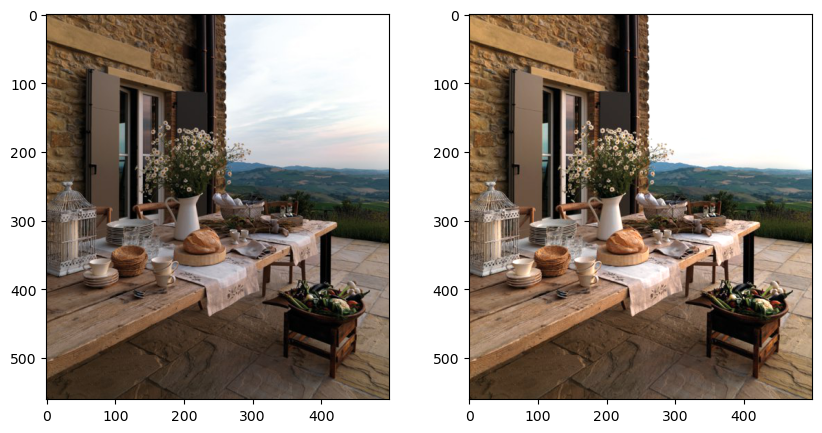

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
path = r'/Users/UNNAMED USER/Desktop/photo3.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

row, col = 200, 330
white = img[row, col, :]
coeffs = 255/white

balanced1 = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced1[..., channel] = img[..., channel] * coeffs[channel]
    
balanced1 = balanced1/255
balanced1[balanced1 > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced1)

116.95729055258467 105.66491265597148 96.15811408199643
0.8221643441608558 0.9100288039329791 1


(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x1a19186b520>)

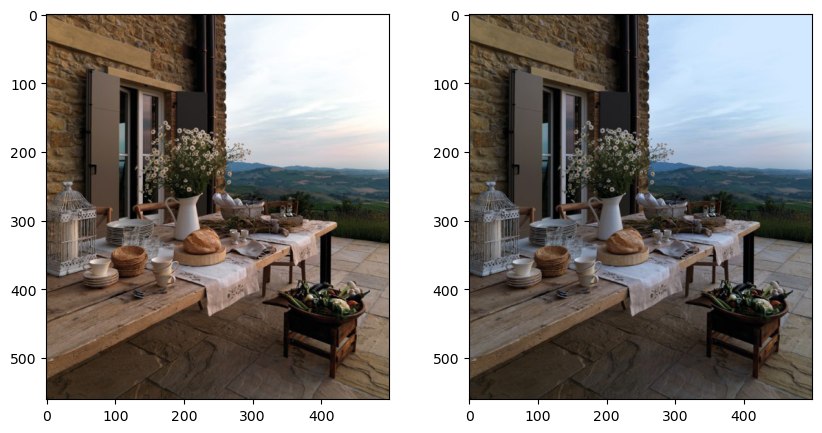

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# Load your image
path = r'/Users/UNNAMED USER/Desktop/photo3.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)



# Compute the mean values for all three colour channels (red, green, blue)
mean_r = np.mean(img[..., 0])
mean_g = np.mean(img[..., 1])
mean_b = np.mean(img[..., 2])
print (mean_r, mean_g, mean_b)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
kr = mean_b/mean_r
kg = mean_b/mean_g
kb = 1
print (kr, kg, kb)

# Apply color balancing and generate the balanced image

balanced2 = np.zeros_like(img, dtype=np.float32)
balanced2[..., 0] = img[..., 0] * kr
balanced2[..., 1] = img[..., 1] * kg
balanced2[..., 2] = img[..., 2] * kb
balanced2 = balanced2/255
balanced2[balanced2 > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced2)

(<AxesSubplot: >, <matplotlib.image.AxesImage at 0x1a19331ce50>)

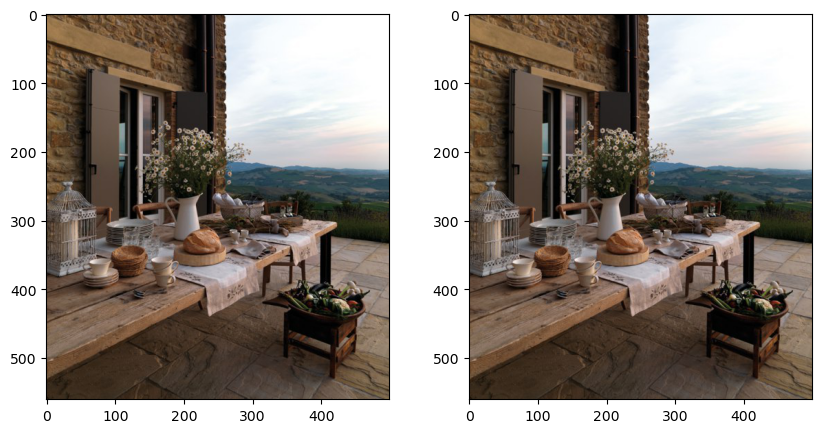

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

# Load your image
path = r'/Users/UNNAMED USER/Desktop/photo3.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


max_r = np.max(img[..., 0]) 
max_g = np.max(img[..., 1]) 
max_b = np.max(img[..., 2]) 


balanced3 = np.zeros_like(img, dtype=np.float32)
balanced3[..., 0] = 255*(img[..., 0] / max_r)
balanced3[..., 1] = 255*(img[..., 1] / max_g)
balanced3[..., 2] = 255*(img[..., 2] / max_b)

balanced3 = balanced3/255
balanced3[balanced3 > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced3)

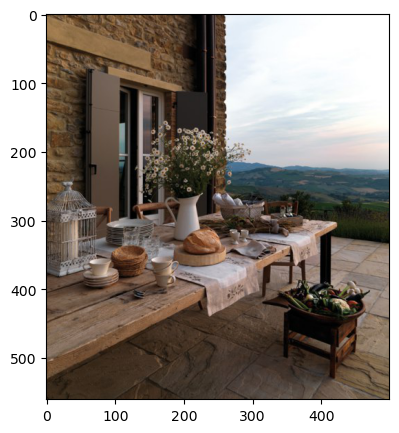

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
path = r'/Users/UNNAMED USER/Desktop/photo3.jpg'
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 999.5, 1121.5, -0.5)

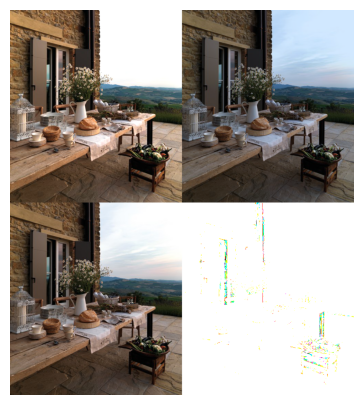

In [8]:
out1 = np.hstack([balanced1, balanced2])
out2 = np.hstack([balanced3, img])
out = np.vstack([out1, out2])
plt.imshow(out)
plt.axis(False)
